In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [339]:
# Parametersfor the benchmarking
fps=1.0e10
num_particles=1000
dt=1.0/fps
spatial_resolution=30.0E-20  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000.0 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

0.00021903148058823087


Generating initial x coordinates

In [340]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[2.700e-18 5.700e-17 2.475e-16 4.110e-17 4.920e-17 5.217e-16 3.456e-16
 3.888e-16 3.078e-16 5.058e-16 3.657e-16 3.354e-16 2.775e-16 2.292e-16
 3.045e-16 1.524e-16 1.479e-16 3.132e-16 5.112e-16 5.193e-16 2.799e-16
 3.213e-16 3.996e-16 5.064e-16 2.493e-16 1.629e-16 4.926e-16 2.334e-16
 5.220e-17 7.800e-17 3.054e-16 3.696e-16 2.556e-16 3.807e-16 3.426e-16
 1.632e-16 3.087e-16 1.857e-16 2.886e-16 2.085e-16 7.440e-17 4.164e-16
 1.170e-17 4.998e-16 5.049e-16 1.785e-16 1.581e-16 1.239e-16 1.161e-16
 4.692e-16 4.482e-16 3.825e-16 4.320e-17 3.603e-16 2.547e-16 9.300e-17
 3.150e-17 2.271e-16 4.443e-16 2.436e-16 2.295e-16 8.550e-17 2.307e-16
 4.173e-16 7.080e-17 4.122e-16 1.620e-17 3.183e-16 7.140e-17 4.827e-16
 1.089e-16 3.573e-16 3.549e-16 2.091e-16 5.640e-17 4.728e-16 2.424e-16
 2.832e-16 3.942e-16 2.418e-16 2.322e-16 2.820e-16 8.760e-17 3.039e-16
 4.713e-16 1.032e-16 4.014e-16 4.644e-16 4.623e-16 2.325e-16 1.374e-16
 5.490e-17 3.669e-16 4.446e-16 1.083e-16 3.357e-16 3.024e-16 2.529e-16
 3.393

In [341]:
part_no = np.arange(0,num_particles,dtype = 'int64') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

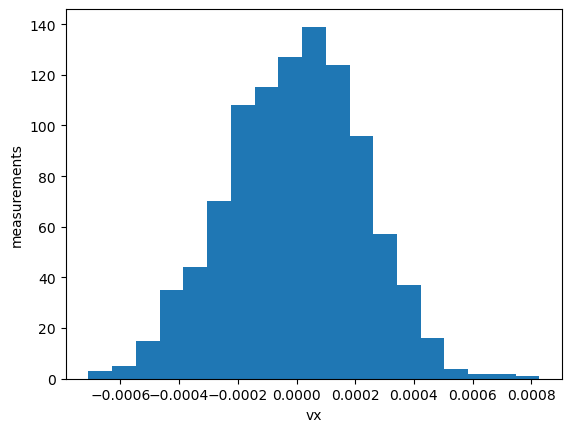

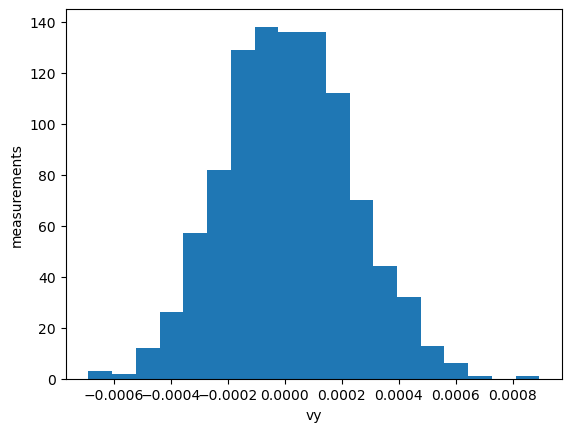

In [342]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

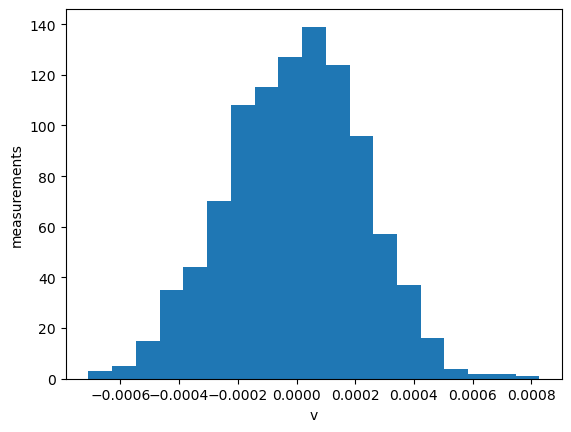

In [343]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[ 2.09604e-04 -4.06140e-04  2.71971e-04 -4.15590e-05  1.73337e-04
 -6.66990e-05 -7.64790e-05 -7.35750e-05 -1.96647e-04  3.75210e-05]
[ 2.09605225e-04 -4.06143433e-04  2.71970980e-04 -4.15607845e-05
  1.73334968e-04 -6.67030950e-05 -7.64821940e-05 -7.35776193e-05
 -1.96651341e-04  3.75213150e-05]
2.021680453382291e-09
3.341021698828855e-05
0.0033410216988288546


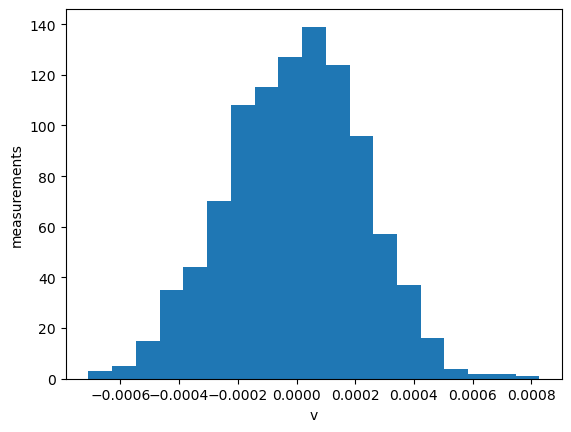

In [344]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [345]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

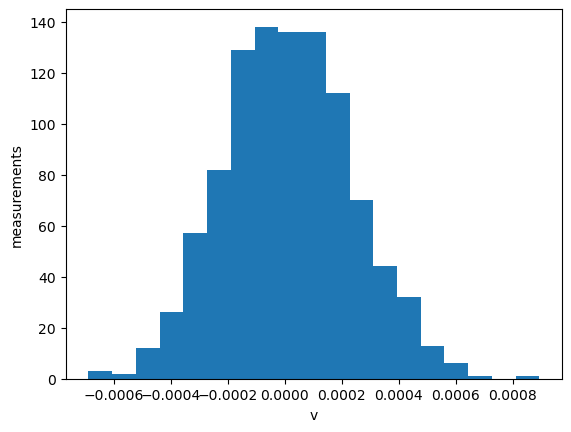

In [346]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [347]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [348]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,1.788000e-16,2.949000e-16,1,0.000397,-3.463830e-04,0.000397,-3.463843e-04
1,1,5.136000e-16,2.829000e-16,1,-0.000387,7.556400e-05,-0.000387,7.556443e-05
2,2,4.068000e-16,1.785000e-16,1,0.000007,3.646200e-05,0.000007,3.646203e-05
3,3,2.310000e-16,1.041000e-16,1,-0.000131,4.672890e-04,-0.000131,4.672898e-04
4,4,4.398000e-16,3.852000e-16,1,0.000021,2.968830e-04,0.000021,2.968859e-04
...,...,...,...,...,...,...,...,...
1995,995,1.710390e-14,3.408000e-16,2,0.000167,2.760000e-07,0.000167,2.779288e-07
1996,996,-2.643000e-16,-4.587150e-14,2,-0.000006,-4.614300e-04,-0.000006,-4.614316e-04
1997,997,2.785470e-14,-2.228730e-14,2,0.000277,-2.268150e-04,0.000277,-2.268173e-04
1998,998,-6.824400e-15,3.120360e-14,2,-0.000069,3.096060e-04,-0.000069,3.096081e-04


<BarContainer object of 19 artists>

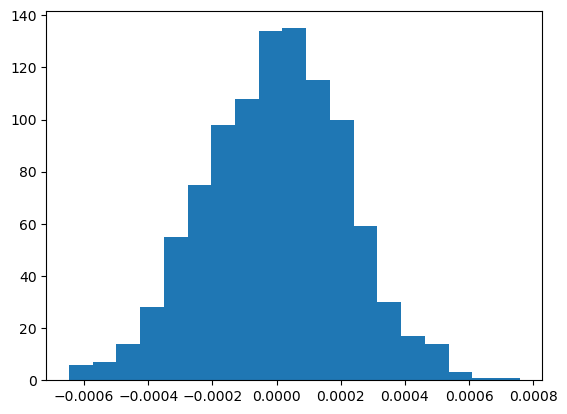

In [349]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

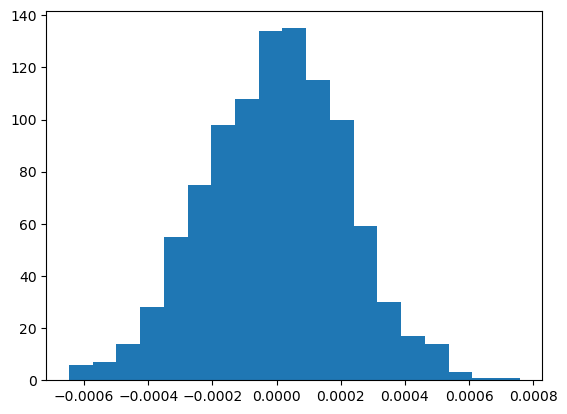

In [350]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

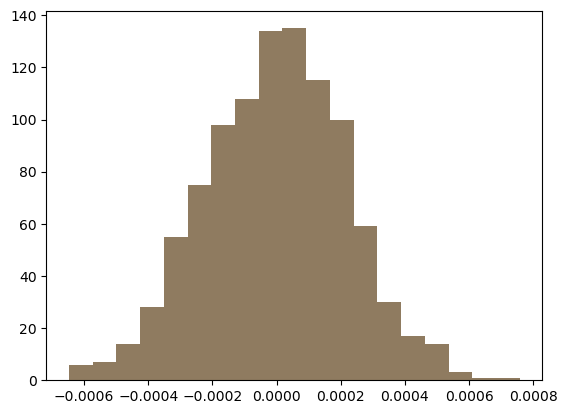

In [351]:
counts, bins = np.histogram(x_y_df['vx'], bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [352]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00021785544159052313
0.00021785662064191576
989.300998782326
989.2902905141038


Function to get the discrepancies

In [353]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [354]:
get_percent_discrepancies(vx_restored,sample_vx)

0.0032385436394943177

<BarContainer object of 19 artists>

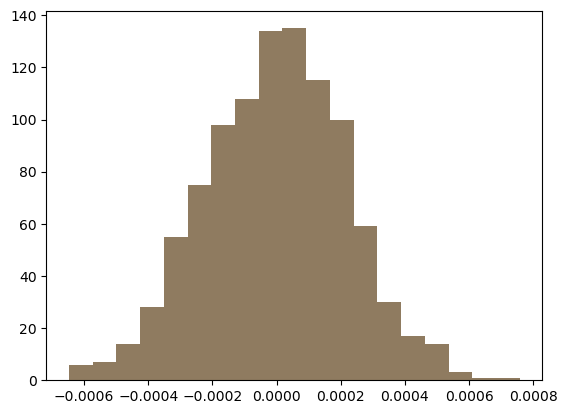

In [355]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [356]:
spatial_resolution_arr=np.arange(1E-6,30E-6,1E-6)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.0e-06 2.0e-06 3.0e-06 4.0e-06 5.0e-06 6.0e-06 7.0e-06 8.0e-06 9.0e-06
 1.0e-05 1.1e-05 1.2e-05 1.3e-05 1.4e-05 1.5e-05 1.6e-05 1.7e-05 1.8e-05
 1.9e-05 2.0e-05 2.1e-05 2.2e-05 2.3e-05 2.4e-05 2.5e-05 2.6e-05 2.7e-05
 2.8e-05 2.9e-05]
29


In [357]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(100,num_particles,spatial_resolution_loop, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

Text(0, 0.5, 'Fractional discrepancy')

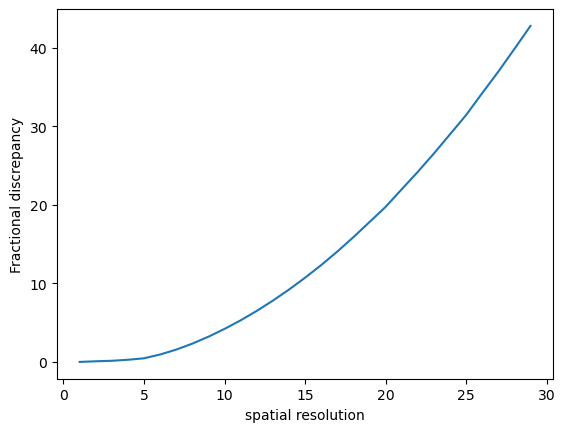

In [358]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr*1000000, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
# ax.set_xscale('log')

In [359]:
fps_arr = np.arange(30.0, 300.0, 30.0)
print(fps_arr)
print(len(fps_arr))

[ 30.  60.  90. 120. 150. 180. 210. 240. 270.]
9


In [360]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities(fps_loop,num_particles,spatial_resolution, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

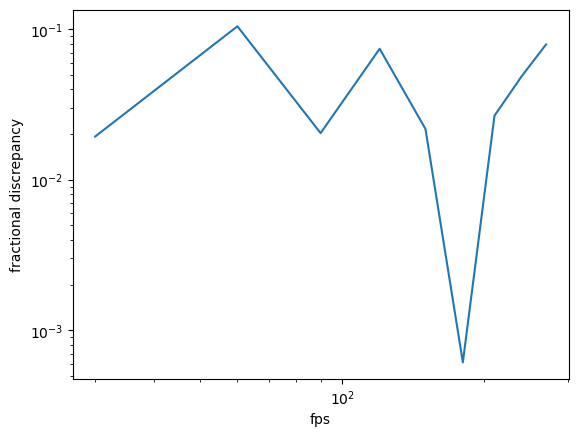

In [361]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

In [362]:
arr_discrep_average = np.zeros((len(spatial_resolution_arr), len(fps_arr)))
for k in range(0, 5):
    arr_discrep = np.zeros((len(spatial_resolution_arr), len(fps_arr)))
    for i in range(len(spatial_resolution_arr)):
        spatial_resolution_loop=spatial_resolution_arr[i]
        for j in range(len(fps_arr)):
            fps_loop=fps_arr[j]
            df=make_velocities(fps_loop,num_particles,spatial_resolution_loop,mu,T, right, up,2)
            discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
            T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
            arr_discrep[i,j]=np.abs(T-T_restored)/T
    arr_discrep_average = arr_discrep_average + arr_discrep / 5

In [363]:
for i in range(0, len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(100,num_particles,spatial_resolution_loop,mu,T, right, up,2)
    df_i_ff = df[df['frame'] == 1]
    std_i = np.std(df_i_ff['vx (restored)'])
    tT = std_i**2 * mass / constants.Boltzmann
    arr_discrep[i] = np.abs((T -tT )) / T

Text(0, 0.5, 'discrepancy (%)')

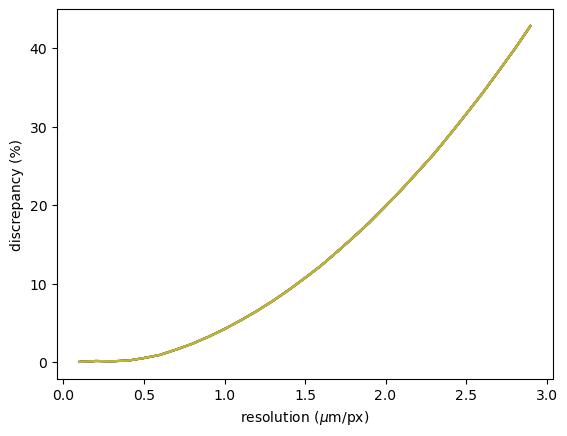

In [364]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr*100000, arr_discrep)
# ax.set_xscale('log')
ax.set_xlabel(r"resolution ($\mu$m/px)")
ax.set_ylabel("discrepancy (%)")

In [365]:
X, Y = np.meshgrid(fps_arr, spatial_resolution_arr* 1000000)

(9.0, 30.0)

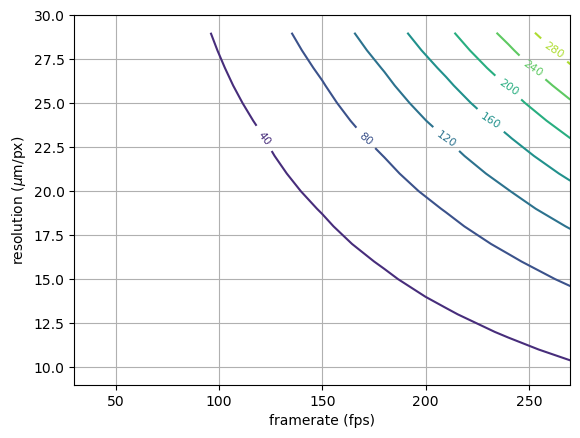

In [366]:
fig4, ax4 = plt.subplots()
khuj = ax4.contour(X, Y, arr_discrep_average)
ax4.set_ylabel(r"resolution ($\mu$m/px)")
ax4.set_xlabel(r"framerate (fps)")
ax4.clabel(khuj,
          inline=True,       # draw labels on the contour lines
          fmt='%1.0f',       # format string for the level numbers
          fontsize=8)
ax4.grid(True)
ax4.set_ylim(9, 30)

Rough work (trying something out)

In [367]:
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x_trial=unif_x.rvs(num_particles)
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y_trial=unif_y.rvs(num_particles)

norm_rv = sts.norm(mu, sigma)
sample_vx_trial = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy_trial= norm_rv.rvs(num_particles) 



In [368]:
def make_velocities_trial(fps,num_particles,spatial_resolution, final_frame, x_init, y_init, vx_init, vy_init):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    # print(sigma)
    frame_full_df=pd.DataFrame()
    sample_x=x_init
    sample_y=y_init
    sample_vx=vx_init
    sample_vy=vy_init
    while init_frame<=final_frame:
        if init_frame==1:
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution

            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
                
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [369]:
trial=make_velocities_trial(fps,num_particles,spatial_resolution, 2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
trial

,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,4.020000e-17,2.976000e-16,1,-0.000060,-0.000034,-0.000060,-0.000034
1,1,4.338000e-16,2.730000e-17,1,0.000076,-0.000103,0.000076,-0.000103
2,2,3.969000e-16,5.400000e-17,1,0.000182,-0.000330,0.000182,-0.000330
3,3,2.445000e-16,3.666000e-16,1,0.000085,-0.000317,0.000085,-0.000317
4,4,1.578000e-16,3.180000e-17,1,0.000270,0.000026,0.000270,0.000026
...,...,...,...,...,...,...,...,...
1995,995,-1.330830e-14,2.969940e-14,2,-0.000138,0.000293,-0.000138,0.000293
1996,996,-2.926500e-14,-5.267490e-14,2,-0.000293,-0.000528,-0.000293,-0.000528
1997,997,-2.656380e-14,-7.571400e-15,2,-0.000268,-0.000080,-0.000268,-0.000080
1998,998,-4.827870e-14,1.918350e-14,2,-0.000486,0.000187,-0.000486,0.000187


In [370]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))


[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [371]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities_trial(fps_loop,num_particles,spatial_resolution,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

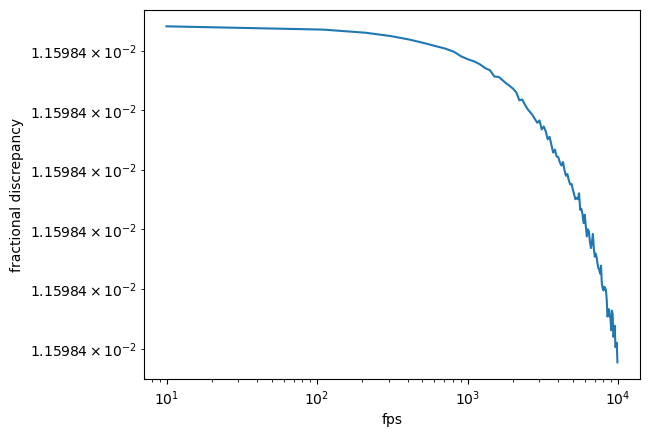

In [372]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

Benchmarking two different experiment setups

In [373]:
# Parametersfor the benchmarking
fps1=99.0
num_particles=1000
dt=1.0/fps1
spatial_resolution1=30.69E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T1=300.0 #temperature in Kelvin
sigma = np.sqrt(kb*T1/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

0.00011996848272192894


In [374]:
x_y_df1 = make_velocities(fps1,num_particles,spatial_resolution1, mu,T1, right, up, 2)
x_y_test = x_y_df1
x_y_test= x_y_test[['part_no', 'x', 'y','frame']]
x_y_test = x_y_test.rename(columns={'part_no': 'particle'})
x_y_test

,particle,x,y,frame
0,0,0.007212,0.036061,1
1,1,0.014823,0.046342,1
2,2,0.048183,0.025810,1
3,3,0.028081,0.012215,1
4,4,0.007734,0.051099,1
...,...,...,...,...
1995,995,0.035846,0.030813,2
1996,996,0.042260,0.043334,2
1997,997,0.012552,0.032654,2
1998,998,0.000061,0.039559,2


In [375]:
#function get_velocities(df, step) calculates velocites of particles with a given step step.
def get_velocities(df, step):
#initialize empy arrays to store data:
    arr_particle = np.array([])
    arr_x = np.array([])
    arr_y = np.array([])
    arr_vx = np.array([])
    arr_vy = np.array([])
    arr_frame = np.array([])
    # get an array containing all frame numbers in the input dataframe:
    frames_listing = np.unique(np.array(df['frame']))
    #cycle throught all those frames:
    for iFrame in range(step, len(frames_listing)):
        #get current frame:
        cur_frame = frames_listing[iFrame]
        #select a dataframe containing data ONLY for that frame:
        df_front_frame = df[(df['frame'] == cur_frame)]
        print(iFrame)
        #cycle throught all particles in the frame and find their velocities as position of the particle in that frame minus position of the same particles step frames ago:
        for i in range(0, len(df_front_frame)):
            #take i-th particle in a frame
            cur_p = df_front_frame['particle'].iloc[i]
            cur_x = df_front_frame['x'].iloc[i]
            cur_y = df_front_frame['y'].iloc[i]
            #find a row with the same particle in a frame step frames ago:
            prev_frame_cur_row = df[((df['frame'] == cur_frame - step) & (df['particle'] == cur_p))]
            #if that particle excisted back then, we will get exactly ONE row:
            if (len(prev_frame_cur_row) == 1):
                #if this row exists, we can take position of that particle in that, previous, frame:
                prev_x = prev_frame_cur_row['x'].iloc[0]
                prev_y = prev_frame_cur_row['y'].iloc[0]
                # so we can calculate velocities:
                cur_vx = cur_x - prev_x
                cur_vy = cur_y - prev_y
                cur_particle = df_front_frame['particle'].iloc[i]
                #and append all parameters of that particle to our data arrays
                arr_vx = np.append(arr_vx, cur_vx)
                arr_vy = np.append(arr_vy, cur_vy)
                arr_particle = np.append(arr_particle, cur_particle)
                arr_x = np.append(arr_x, cur_x)
                arr_y = np.append(arr_y, cur_y)
                arr_frame = np.append(arr_frame, cur_frame)
    #save output as a dataframe containing all the info we need:
    data = {'frame':arr_frame, 'particle':arr_particle, 'x': arr_x, 'y': arr_y, 'vx': arr_vx, 'vy':arr_vy}
    ret_df = pd.DataFrame(data)
                
    return ret_df

In [376]:
df_velocities = get_velocities(x_y_test, 1)
df_velocities

1


,frame,particle,x,y,vx,vy
0,2.0,0.0,0.007212,0.036061,0.000000,0.000000
1,2.0,1.0,0.014823,0.046342,0.000000,0.000000
2,2.0,2.0,0.048153,0.025810,-0.000031,0.000000
3,2.0,3.0,0.028081,0.012184,0.000000,-0.000031
4,2.0,4.0,0.007734,0.051099,0.000000,0.000000
...,...,...,...,...,...,...
995,2.0,995.0,0.035846,0.030813,-0.000031,0.000000
996,2.0,996.0,0.042260,0.043334,0.000000,-0.000031
997,2.0,997.0,0.012552,0.032654,0.000000,-0.000031
998,2.0,998.0,0.000061,0.039559,0.000000,0.000000


In [377]:
std1= np.std(df_velocities['vx'])
std_SI=std1/dt
print(std_SI)
T_restored=mass*std_SI**2/constants.Boltzmann
print(T_restored)
print(T_restored/11604.0)  # convert to eV


0.0015156386440225652
47882.65928289167
4.126392561434994


Experiment 2

In [378]:
# Parametersfor the benchmarking
fps2=294.0
num_particles=1000
dt=1.0/fps2
spatial_resolution2=30.69E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T2=300.0 #temperature in Kelvin
sigma = np.sqrt(kb*T2/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

0.00011996848272192894


In [379]:
x_y_df2 = make_velocities(fps2,num_particles,spatial_resolution2, mu,T2, right, up, 2)
x_y_test = x_y_df2
x_y_test= x_y_test[['part_no', 'x', 'y','frame']]
x_y_test = x_y_test.rename(columns={'part_no': 'particle'})
x_y_test

,particle,x,y,frame
0,0,0.045912,0.005279,1
1,1,0.013350,0.037288,1
2,2,0.053677,0.039958,1
3,3,0.033329,0.038976,1
4,4,0.036398,0.039897,1
...,...,...,...,...
1995,995,0.052817,0.042659,2
1996,996,0.032255,0.024890,2
1997,997,0.008532,0.025534,2
1998,998,0.024982,0.019672,2


In [380]:
df_velocities2 = get_velocities(x_y_test, 1)
df_velocities2

1


,frame,particle,x,y,vx,vy
0,2.0,0.0,0.045882,0.005279,-0.000031,0.000000
1,2.0,1.0,0.013319,0.037288,-0.000031,0.000000
2,2.0,2.0,0.053646,0.039958,-0.000031,0.000000
3,2.0,3.0,0.033299,0.038976,-0.000031,0.000000
4,2.0,4.0,0.036368,0.039866,-0.000031,-0.000031
...,...,...,...,...,...,...
995,2.0,995.0,0.052817,0.042659,0.000000,0.000000
996,2.0,996.0,0.032255,0.024890,0.000000,-0.000031
997,2.0,997.0,0.008532,0.025534,-0.000031,0.000000
998,2.0,998.0,0.024982,0.019672,-0.000031,-0.000031


In [381]:
std2= np.std(df_velocities['vx'])
std_SI=std2/dt
print(std_SI)
T_restored=mass*std_SI**2/constants.Boltzmann
print(T_restored)
print(T_restored/11604.0)

0.004500987488309437
422281.96487868845
36.39106901746712


In [382]:
print(300/11604.0)

0.025853154084798345
